# We do regression on predicting the Boston housing price.

In [7]:
from keras.datasets import boston_housing
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

import pandas as pd
pd.DataFrame(train_data).describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
pd.DataFrame(test_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.00000
mean,3.092336,10.901961,11.264902,0.098039,0.544156,6.354157,66.849020,4.011982,9.980392,417.500000,18.374510,364.163333,12.30549
std,5.373088,21.572929,7.084148,0.298836,0.110015,0.672335,29.034993,2.379973,8.772121,177.390477,2.026785,79.138325,6.69540
min,0.013110,0.000000,1.220000,0.000000,0.392000,4.880000,6.000000,1.465500,1.000000,187.000000,13.000000,24.650000,1.92000
25%,0.084840,0.000000,5.455000,0.000000,0.445500,5.966000,42.450000,2.117375,4.000000,279.250000,17.400000,377.692500,7.30500
50%,0.229015,0.000000,9.795000,0.000000,0.532000,6.229000,73.750000,3.324850,5.000000,330.000000,18.900000,392.110000,11.06000
75%,3.779445,16.250000,18.100000,0.000000,0.609000,6.633750,92.975000,5.276650,24.000000,666.000000,20.200000,396.780000,15.91500
max,25.046100,90.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,31.99000


We can see from the infomation. First, we have 404 training samples and 102 testing samples, so we need cross-validation. Second, the mean value of features is very different, so we need normalization.

# Normalization. Attention, don't use any infomation from testing data even normalization.

In [22]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data=(train_data-mean)/std
test_data=(test_data-mean)/std

In [23]:
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation="relu",input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation="relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
    return model

from sklearn.model_selection import KFold

folds=list(KFold(n_splits=4,shuffle=True,random_state=16).split(train_data,train_labels))
print (len(folds))

4


# K-fold Validation

In [24]:
mae_scores=[]
maes=[]
for i in range(4):
    print("Fold :"+str(i))
    train_idxs,val_idxs=folds[i]
    part_train_data=train_data[train_idxs]
    part_train_labels=train_labels[train_idxs]
    val_data=train_data[val_idxs]
    val_labels=train_labels[val_idxs]
    model=build_model()
    history=model.fit(part_train_data,part_train_labels,epochs=100,batch_size=64,verbose=0)
    print(history.history.keys())
    maes.append(history.history["mean_absolute_error"])
    test_mse,test_mae=model.evaluate(test_data,test_labels)
    mae_scores.append(test_mae)
    

Fold :0
dict_keys(['mean_absolute_error', 'loss'])
102/102 [==============================] - 0s 745us/step
Fold :1
dict_keys(['mean_absolute_error', 'loss'])
102/102 [==============================] - 0s 774us/step
Fold :2
dict_keys(['mean_absolute_error', 'loss'])
102/102 [==============================] - 0s 837us/step
Fold :3
dict_keys(['mean_absolute_error', 'loss'])
102/102 [==============================] - 0s 876us/step


In [25]:
import numpy as np

print(np.mean(mae_scores))
print(mae_scores)

2499.52679204
[2071.8666824640013, 3048.0521168428309, 2023.1127714269301, 2855.0755974264707]


In [26]:
maes_avg=[np.mean([mae[i] for mae in maes]) for i in range(100)]

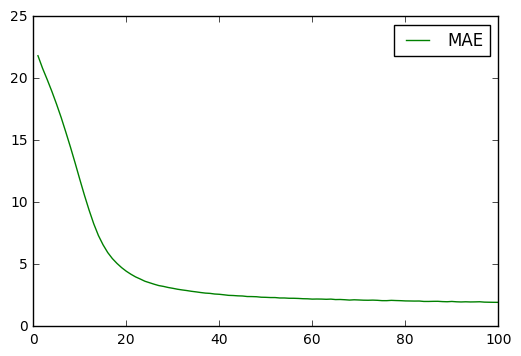

No Epoch 99 got the minest mae.


In [28]:
import matplotlib.pyplot as plt

epochs=range(1,len(maes_avg)+1)

plt.plot(epochs,maes_avg,label="MAE")
plt.legend(loc="best")
plt.show()

print("No Epoch %s got the minest mae."%np.argmin(maes_avg))